# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
from google.colab import files
uploaded = files.upload()


Saving EEA .jpg to EEA .jpg


RGB array shape: (1200, 1600, 3)
Grayscale array shape: (1200, 1600)
Pixel at (y=771, x=440):
   RGB  = [ 63 129 161]
   Gray = 108

Pixel at (y=412, x=239):
   RGB  = [112 169 137]
   Gray = 139

Pixel at (y=342, x=301):
   RGB  = [167 183 170]
   Gray = 163

Pixel at (y=2, x=456):
   RGB  = [ 31 114 182]
   Gray = 94

Pixel at (y=1000, x=699):
   RGB  = [126  94  69]
   Gray = 91



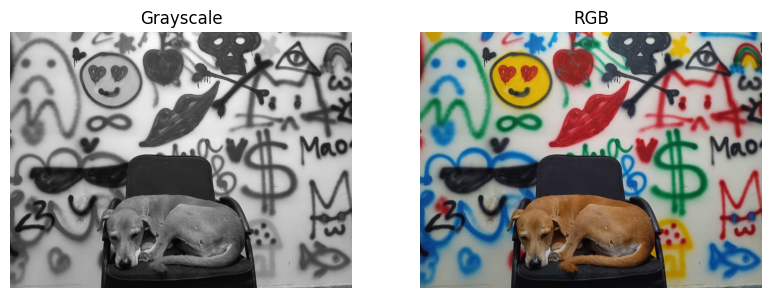

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr= cv2.imread("EEA .jpg")
img_rgb= img_bgr[:,:,::-1]
b=img_bgr[:,:,0]
g=img_bgr[:,:,1]
r=img_bgr[:,:,2]
gray= (0.222*r + 0.587*g +0.114*b).astype(np.uint8)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("RGB")
plt.imshow(img_rgb)
axis=plt.axis('off')

print("RGB array shape:", img_rgb.shape)
print("Grayscale array shape:", gray.shape)
h,w=gray.shape

#i have picked random 5 points and found the pixels at those points
for i in range(5):
    y = np.random.randint(0, h)
    x = np.random.randint(0, w)
    rgb_pixel = img_rgb[y, x]
    gray_pixel = gray[y, x]

    print(f"Pixel at (y={y}, x={x}):")
    print(f"   RGB  = {rgb_pixel}")
    print(f"   Gray = {gray_pixel}\n")

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

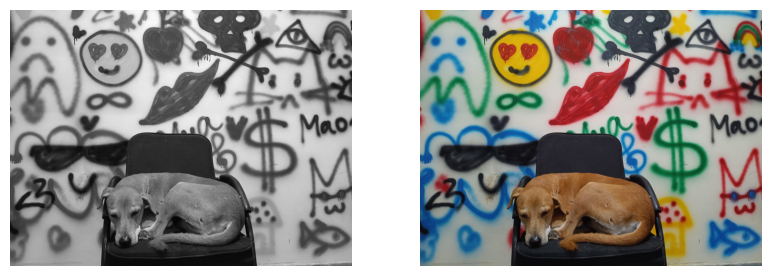

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("EEA .jpg")
img_rgb= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

gray=cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.axis('off')


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

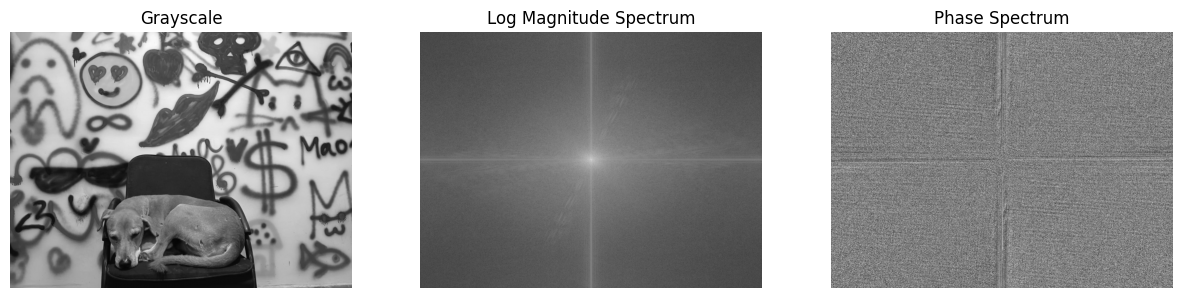

In [12]:
gray_float= gray.astype(np.float32)
f= np.fft.fft2(gray_float)
fshift= np.fft.fftshift(f)
magnitude =np.log(1 + magnitude)
phase = np.angle(fshift)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Grayscale")
plt.imshow(gray_float, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title("Log Magnitude Spectrum")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title("Phase Spectrum")
plt.imshow(phase, cmap='gray')
plt.axis('off')


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

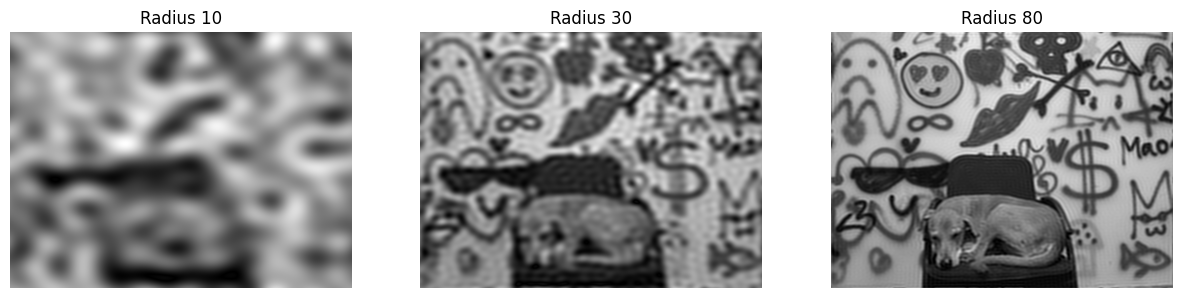

In [13]:
rows, cols =gray.shape
crow, ccol = rows//2,cols//2
radius=10

mask_lpf1= np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf1,(ccol,crow),radius,1,-1)
f_lpf1=fshift*mask_lpf1
ishift_lpf1=np.fft.ifftshift(f_lpf1)
img_back_lpf1=np.fft.ifft2(ishift_lpf1)
img_back_lpf1=np.abs(img_back_lpf1)

# doing same thing with radius 30

h, w =gray.shape
crow, ccol = h//2,w//2
radius=30

mask_lpf2= np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf2,(ccol,crow),radius,1,-1)
f_lpf2=fshift*mask_lpf2
ishift_lpf2=np.fft.ifftshift(f_lpf2)
img_back_lpf2=np.fft.ifft2(ishift_lpf2)
img_back_lpf2=np.abs(img_back_lpf2)

# doing same thing with radius 30
h, w =gray.shape
crow, ccol = h//2,w//2
radius=80

mask_lpf3= np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf3,(ccol,crow),radius,1,-1)
f_lpf3=fshift*mask_lpf3
ishift_lpf3=np.fft.ifftshift(f_lpf3)
img_back_lpf3=np.fft.ifft2(ishift_lpf3)
img_back_lpf3=np.abs(img_back_lpf3)

#now i'll plot the graphs
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Radius 10")
plt.imshow(img_back_lpf1, cmap='gray')
plt.axis('off')


plt.subplot(1,3,2)
plt.title("Radius 30")
plt.imshow(img_back_lpf2, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Radius 80")
plt.imshow(img_back_lpf3, cmap='gray')
plt.axis('off')

#the blur increases as we decrease the radius because smaller the radius less amount of higher frequencies are passed which define the edges and fine details



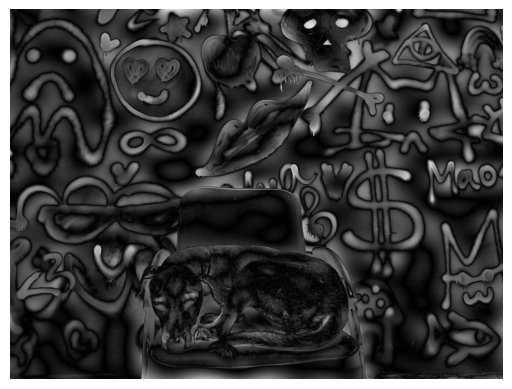

In [14]:
h, w =gray.shape
crow, ccol = h//2,w//2
radius=10

mask_hpf= np.zeros((rows,cols),np.uint8)
cv2.circle(mask_hpf,(ccol,crow),radius,1,-1)
mask_hpf=1-mask_hpf
f_hpf=fshift*mask_hpf
ishift_hpf=np.fft.ifftshift(f_hpf)
img_back_hpf=np.fft.ifft2(ishift_hpf)
img_back_hpf=np.abs(img_back_hpf)

plt.imshow(img_back_hpf, cmap='gray')
plt.axis('off')
plt.show()

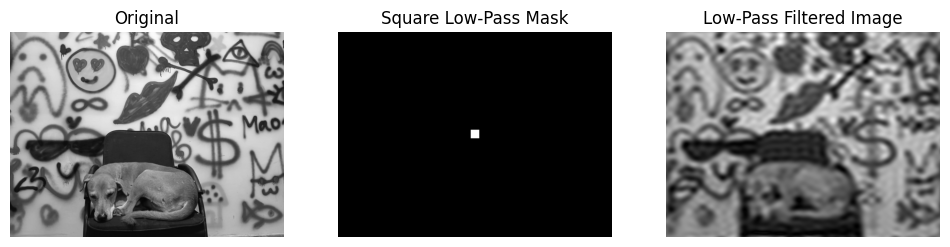

In [24]:


def square_mask(shape, size):
    H, W = shape
    mask = np.zeros((H, W), dtype=np.uint8)
# H and W represents the height and width of the image respectively
# i have created a lpf square mask
    top  = H//2 - size//2
    left = W//2 - size//2

    mask[top:top+size, left:left+size] = 1

    return mask

mask= square_mask(gray.shape, 50)
F_filtered = fshift * mask
F_ishift = np.fft.ifftshift(F_filtered)
img_filtered = np.fft.ifft2(F_ishift)
img_filtered = np.abs(img_filtered)
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title("Square Low-Pass Mask")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_filtered, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis('off')

plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

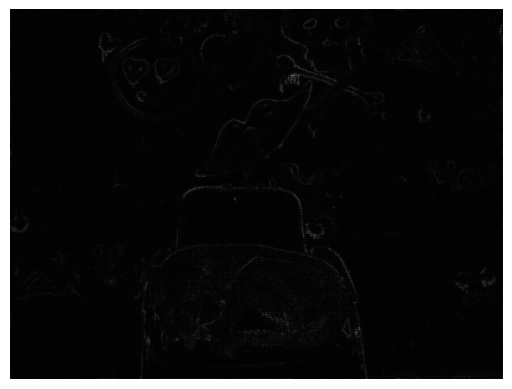

In [ ]:
phase_only = fshift / np.abs(fshift)
unshift= np.fft.ifftshift(phase_only)
img_reconstructed=np.fft.ifft2(unshift)
img_phase_only=np.abs(img_reconstructed)
plt.imshow(img_phase_only, cmap='gray')
plt.axis('off')
plt.show()

# Observation: the reconstructed image shows strong edges/structure similar to the original,
# but textures and absolute brightness are different because magnitude was thrown away.

# Conclusion: phase carries most of the positional/structural information of the image.




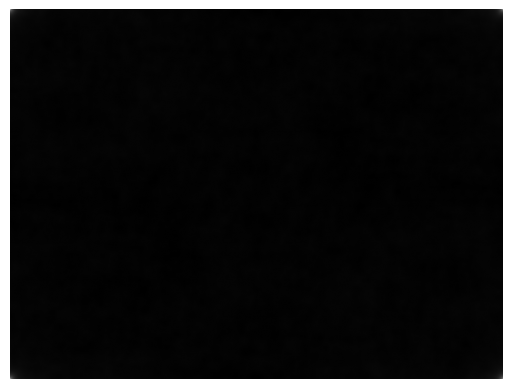

In [29]:
mag_only = np.abs(fshift)
unshift= np.fft.ifftshift(mag_only)
img_reconstructed=np.fft.ifft2(unshift)
img_mag_only=np.abs(img_reconstructed)
plt.imshow(img_mag_only, cmap='gray')
plt.axis('off')
plt.show()

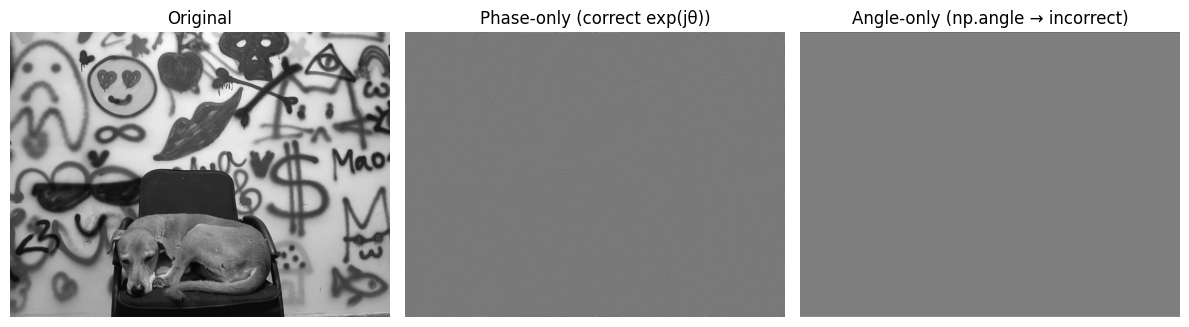

In [ ]:
# we cannot feed np.angle(...) directly into ifft2: you first must
# convert angles back into complex numbers via exp(1j * angle).
# eg. complex_from_angle = np.exp(1j * np.angle(fshift))

# So:
# 1)fshift / np.abs(fshift)  = already a complex spectrum (good to invert)
# 2)np.angle(fshift) = just raw angles; needs np.exp(1j*angle) to become usable

phase_only = fshift / (np.abs(fshift) + 1e-12)


rec_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
rec_phase = np.real(rec_phase)


rec_phase_u8 = cv2.normalize(rec_phase, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


theta = np.angle(fshift)
rec_angle = np.fft.ifft2(theta)
rec_angle_u8 = cv2.normalize(rec_angle, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Phase-only (correct exp(jθ))")
plt.imshow(rec_phase_u8, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Angle-only (np.angle → incorrect)")
plt.imshow(rec_angle_u8, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

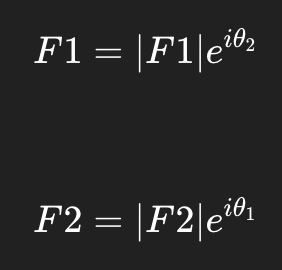

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [30]:
from google.colab import files
uploaded = files.upload()

Saving EEA .jpg to EEA  (1).jpg


In [31]:
from google.colab import files
uploaded = files.upload()

Saving IMG_8703[1].JPG to IMG_8703[1].JPG


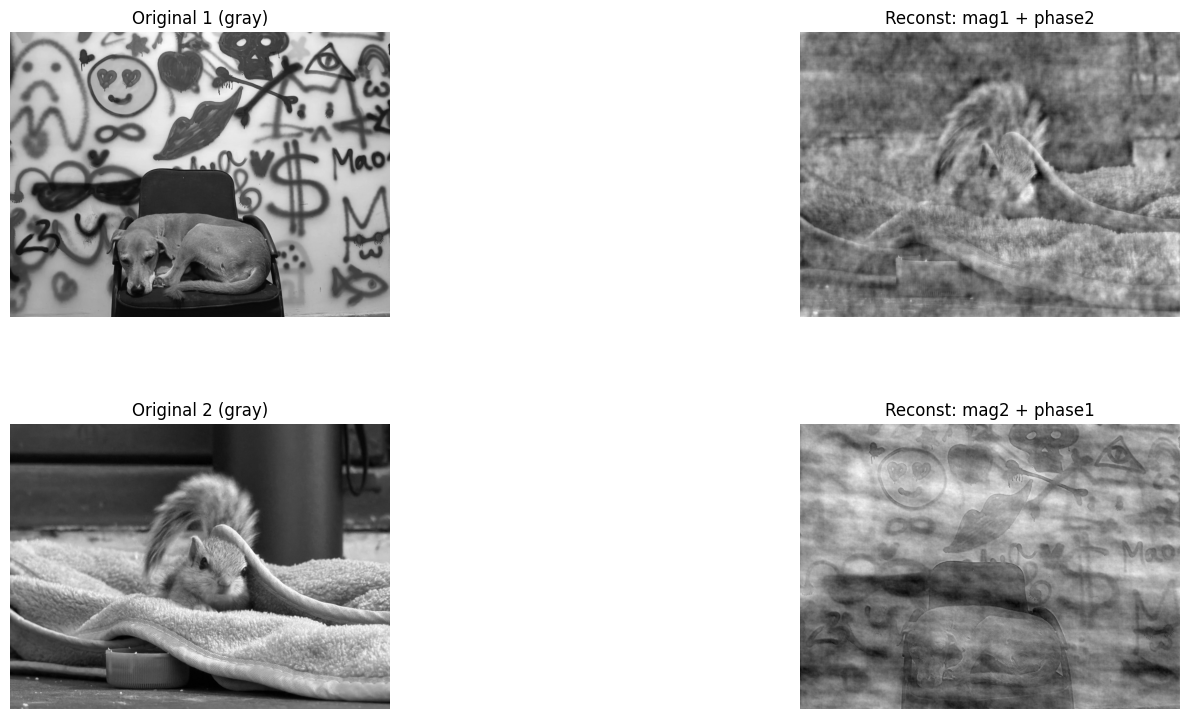

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def create_grayscale(bgr):

    b = bgr[:, :, 0].astype(np.float32)
    g = bgr[:, :, 1].astype(np.float32)
    r = bgr[:, :, 2].astype(np.float32)
    gray = (0.299 * r + 0.587 * g + 0.114 * b).astype(np.uint8)
    return gray

def normalize_to_u8(x, eps=1e-9):

    xreal = np.real(x)
    mn = xreal.min()
    mx = xreal.max()
    if (mx - mn) < eps:
        return np.zeros_like(xreal, dtype=np.uint8)
    res = ((xreal - mn) / (mx - mn) * 255.0)
    return np.clip(res, 0, 255).astype(np.uint8)


img1_bgr = cv2.imread("EEA  (1).jpg")
img2_bgr = cv2.imread("IMG_8703[1].JPG")


gray1 = create_grayscale(img1_bgr)
gray2 = create_grayscale(img2_bgr)

h1, w1 = gray1.shape
h2, w2 = gray2.shape


if (h1, w1) != (h2, w2):
    gray2 = cv2.resize(gray2, (w1, h1), interpolation=cv2.INTER_AREA)


F1 = np.fft.fft2(gray1.astype(np.float32))
F2 = np.fft.fft2(gray2.astype(np.float32))
f1 = np.fft.fftshift(F1)
f2 = np.fft.fftshift(F2)


mag1 = np.abs(f1)
mag2 = np.abs(f2)
ang1 = np.angle(f1)
ang2 = np.angle(f2)


final_1mag_2phase = mag1 * np.exp(1j * ang2)
final_2mag_1phase = mag2 * np.exp(1j * ang1)


rec1 = np.fft.ifft2(np.fft.ifftshift(final_1mag_2phase))
rec2 = np.fft.ifft2(np.fft.ifftshift(final_2mag_1phase))


rec1_vis = normalize_to_u8(rec1)
rec2_vis = normalize_to_u8(rec2)


log_mag1 = np.log(1 + mag1)
log_mag2 = np.log(1 + mag2)


plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original 1 (gray)")
plt.imshow(gray1, cmap='gray'); plt.axis('off')


plt.subplot(2, 3, 3)
plt.title("Reconst: mag1 + phase2")
plt.imshow(rec1_vis, cmap='gray'); plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Original 2 (gray)")
plt.imshow(gray2, cmap='gray'); plt.axis('off')


plt.subplot(2, 3, 6)
plt.title("Reconst: mag2 + phase1")
plt.imshow(rec2_vis, cmap='gray'); plt.axis('off')

plt.tight_layout()
plt.show()


# Observation:
# When we swapped magnitude and phase, the reconstructed images showed that
# phase carries almost all the structural information of an image (edges, shapes, outlines).
# magnitude mainly controls the texture and overall intensity distribution.
# Therefore:
# Image reconstructed using magnitude of Image1 + phase of Image2 looks like Image2 in structure.
# Image reconstructed using magnitude of Image2 + phase of Image1 looks like Image1 in structure.
# This proves that PHASE determines the geometry/structure of an image,
# while MAGNITUDE determines the texture and contrast.

